# Recommender Systems

        Book: Recomender Systems by Jannach and Zanker
        
        > Linear Algebra
***
        
## Two Most Common Type of Recommender System

- ** Content-Based **

    Focusing on the attributes of the items and recommending ** based on the similarity between items ** ( ex. based on similar items )


- ** Collaborative Filtering (CF) **

    ** Based on the knowledge of users' attitude to items** , which means it uses the "wisdom of crowd" to recommend the items ( ex. based on others shopping experience )
    
    > can be divided into ** Memory-Based Collaborative Filtering** and ** Model-Based Colaborative filtering**.
    
    
- **Hybrid Recommender Systems** 

    Combine Content-Based Model and Collaborative Filtering Model
***

## explicit feedback model/ implicit feedback model

Most recommendation models consist of building a user-by-item matrix (pivot table). If the entries value is the **numerical ratings that users give items, then this is called an explicit feedback model**. Alternatively, **one may include implicit feedback which are actions by a user that signify a positive or negative preference** for a given item (such as viewing the item online). 

> These two scenarios often must be treated differently.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [4]:
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 944
Num of Movies: 1682


- ## Preprocess/ Clean Data

In [5]:
df.item_id.nunique(), df.title.nunique()

(1682, 1664)

In [6]:
check_unique = df.groupby("title").item_id.nunique()
check_unique[check_unique > 1]

title
Body Snatchers (1993)             2
Butcher Boy, The (1998)           2
Chairman of the Board (1998)      2
Chasing Amy (1997)                2
Deceiver (1997)                   2
Designated Mourner, The (1997)    2
Desperate Measures (1998)         2
Fly Away Home (1996)              2
Hugo Pool (1997)                  2
Hurricane Streets (1998)          2
Ice Storm, The (1997)             2
Kull the Conqueror (1997)         2
Money Talks (1997)                2
Nightwatch (1997)                 2
Sliding Doors (1998)              2
Substance of Fire, The (1996)     2
That Darn Cat! (1997)             2
Ulee's Gold (1997)                2
Name: item_id, dtype: int64

    id is not unique, we would like to clean id....

In [7]:
check_unique = pd.DataFrame(check_unique[check_unique > 1])
#check_unique.join(df.set_index("title"),how = "left")
check_unique["count"] = check_unique
check_unique.drop("item_id",inplace=True,axis = 1)

In [8]:
check_unique.join(df.set_index("title").item_id,how = "left").groupby(["title","item_id"]).item_id.describe()

count    mean  std     min     25%  \
title                          item_id                                       
Body Snatchers (1993)          573       33.0   573.0  0.0   573.0   573.0   
                               670       36.0   670.0  0.0   670.0   670.0   
Butcher Boy, The (1998)        1645       1.0  1645.0  NaN  1645.0  1645.0   
                               1650       1.0  1650.0  NaN  1650.0  1650.0   
Chairman of the Board (1998)   1234       8.0  1234.0  0.0  1234.0  1234.0   
                               1654       1.0  1654.0  NaN  1654.0  1654.0   
Chasing Amy (1997)             246      124.0   246.0  0.0   246.0   246.0   
                               268      255.0   268.0  0.0   268.0   268.0   
Deceiver (1997)                309       28.0   309.0  0.0   309.0   309.0   
                               1606       1.0  1606.0  NaN  1606.0  1606.0   
Designated Mourner, The (1997) 1256       3.0  1256.0  0.0  1256.0  1256.0   
                               1257       4.0  1257.0  0.0  1257.0  1257.0   
Desperate Measures (1998)      329       45.0   329.0  0.0   329.0   329.0   
                               348       27.0   348.0  0.0   348.0   348.0   
Fly Away Home (1996)           304      149.0   304.0  0.0   304.0   304.0   
                               500       31.0   500.0  0.0   500.0   500.0   
Hugo Pool (1997)               1175       5.0  1175.0  0.0  1175.0  1175.0   
                               1617       2.0  1617.0  0.0  1617.0  1617.0   
Hurricane Streets (1998)       1395       6.0  1395.0  0.0  1395.0  1395.0   
                               1607       3.0  1607.0  0.0  1607.0  1607.0   
Ice Storm, The (1997)          305       87.0   305.0  0.0   305.0   305.0   
                               865       21.0   865.0  0.0   865.0   865.0   
Kull the Conqueror (1997)      266       35.0   266.0  0.0   266.0   266.0   
                               680       34.0   680.0  0.0   680.0   680.0   
Money Talks (1997)             876       47.0   876.0  0.0   876.0   876.0   
                               881       45.0   881.0  0.0   881.0   881.0   
Nightwatch (1997)              1477       2.0  1477.0  0.0  1477.0  1477.0   
                               1625       1.0  1625.0  NaN  1625.0  1625.0   
Sliding Doors (1998)           1429       4.0  1429.0  0.0  1429.0  1429.0   
                               1680       1.0  1680.0  NaN  1680.0  1680.0   
Substance of Fire, The (1996)  711        1.0   711.0  NaN   711.0   711.0   
                               1658       3.0  1658.0  0.0  1658.0  1658.0   
That Darn Cat! (1997)          878       33.0   878.0  0.0   878.0   878.0   
                               1003       8.0  1003.0  0.0  1003.0  1003.0   
Ulee's Gold (1997)             297       50.0   297.0  0.0   297.0   297.0   
                               303      134.0   303.0  0.0   303.0   303.0   

                                           50%     75%     max  
title                          item_id                          
Body Snatchers (1993)          573       573.0   573.0   573.0  
                               670       670.0   670.0   670.0  
Butcher Boy, The (1998)        1645     1645.0  1645.0  1645.0  
                               1650     1650.0  1650.0  1650.0  
Chairman of the Board (1998)   1234     1234.0  1234.0  1234.0  
                               1654     1654.0  1654.0  1654.0  
Chasing Amy (1997)             246       246.0   246.0   246.0  
                               268       268.0   268.0   268.0  
Deceiver (1997)                309       309.0   309.0   309.0  
                               1606     1606.0  1606.0  1606.0  
Designated Mourner, The (1997) 1256     1256.0  1256.0  1256.0  
                               1257     1257.0  1257.0  1257.0  
Desperate Measures (1998)      329       329.0   329.0   329.0  
                               348       348.0   348.0   348.0  
Fly Away Home (1996)           304 

       above movies all has two id lol...

In [9]:
# reformat id
new_movie_index = dict((y, x) for x, y in zip(range(df.title.nunique()),df.title.unique()))

In [10]:
df.item_id = df.title.map(new_movie_index)
df.item_id.nunique(), df.title.nunique()

(1664, 1664)

In [11]:
# first get pivot table
user_item_matrix = pd.pivot_table(df,"rating","user_id","item_id",fill_value=0)
user_item_matrix.head(2)

item_id,0,1,2,3,4,5,6,7,8,9,...,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663
user_id,,,,,,,,,,,,,,,,,,,,,
0,5,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,5,4,5,0,0,4,0,0,4,...,0,0,0,0,0,0,0,0,0,0


***
- ## Sparsity 

    This means that the percentage of the user-item-matrix have a real value

$$ {\#\mbox{ of valid entry } \over \# \mbox{ of total entry } } \times 100 \%$$

    One thing to note is that if the sparsity of the matrix is below 1% (rule of thumb), then the dataset might be too sparse to perform any sort of modeling.
        

In [12]:
print 100.0*sum(user_item_matrix[user_item_matrix != 0].count())/user_item_matrix.shape[0]/user_item_matrix.shape[1] ,"%"

6.34676499348 %


In [13]:
user_item_matrix[user_item_matrix != 0].count(axis = 1).describe()

count    944.000000
mean     105.610169
std      100.622846
min        3.000000
25%       33.000000
50%       64.000000
75%      147.250000
max      736.000000
dtype: float64

(0, 50)

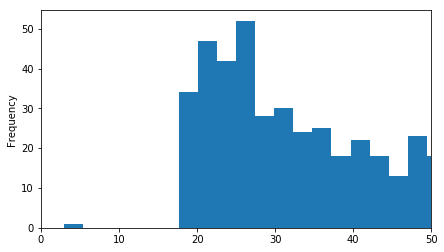

In [14]:
plt.figure(figsize=(7,4))
user_item_matrix[user_item_matrix != 0].count(axis = 1).plot(kind = "hist",bins = 300)
plt.xlim(0,50)

   Notice that some people rated less than 10 movies, therefore we would like to remove this data which is hard for us to consider their opinion as "useful". In this case we would like to remomve the user in our model who rated less than 10 movies. Thus, every user has rated at least 19 movies (show below).

In [15]:
print list(user_item_matrix[user_item_matrix[user_item_matrix != 0].count(axis = 1) <= 10].index)
user_item_matrix = user_item_matrix[user_item_matrix[user_item_matrix != 0].count(axis = 1) > 10]

[0]


In [16]:
df = df[df.user_id != 0]

In [17]:
user_item_matrix[user_item_matrix != 0].count(axis = 1).describe()

count    943.000000
mean     105.718982
std      100.620656
min       19.000000
25%       33.000000
50%       64.000000
75%      147.500000
max      736.000000
dtype: float64

- ## Train Test Split
    
    Note that in this case, we have no specific predicted/responsed variables. What we want to do is using some existing entries to predict other none entries based on a specific user or item. More appropriately, we would like to randomly split our data into training and test sets by removing some exsiting ratings from the training set and placing them in the test set. 
    
    There are two ways to do this.
    >1.
    
    > we can just segement the **original data frame** into two sets of data, basically we remove some rate
    
    >         sklearn.cross_validation import train_test_split
    > 2.
    
    > The first approach might remove all the rate from single person which is what we want to avoiding, since it will have no attiribute for us to recommand other movies for him cause we don't have any his data in training model. More appropriately, we would like to removing some ratings **per user** from the training set and placing them in the test set.
    
    > In this case, it's reasonble for us to removing 9 ratings per user from the training set since each user has rated at least 19 movies

In [18]:
#1.
from sklearn.model_selection import train_test_split
train_data1, test_data1 = train_test_split(df, test_size=0.25)

#2.
def train_test_split(ratings):
    test = pd.DataFrame(np.zeros(ratings.shape), index = ratings.index, columns = ratings.columns)
    train = ratings.copy()
    for i in range(len(ratings.index)):
        
        
        test_ratings = np.random.choice(
                        ratings.iloc[i].nonzero()[0], # Return the 2D-indices of the elements that are non-zero
                        size=9, 
                        replace=False) # sample without replacement
        
        train.iloc[i,test_ratings] = 0
        test.iloc[i,test_ratings] = ratings.iloc[i,test_ratings]
        
    # Test and training are truly disjoint
    assert(np.all((train * test) == 0)) 
    return train, test

train_data2, test_data2 =train_test_split(user_item_matrix)

# Model-based Collaborative Filtering

   Model-based Collaborative Filtering is based on **matrix factorization (MF)** which has received greater exposure, mainly as an **unsupervised learning method** for **[hidden variable](https://www.theanalysisfactor.com/what-is-a-latent-variable/) decomposition** and **dimensionality reduction**. 

- ## Matrix factorization 

    is widely used for recommender systems where it **can deal better with scalability and sparsity than Memory-based CF**. 
    
    The goal of MF is to learn the hidden preferences of users and the hidden attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the hidden features of users and items. 
    
    When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization you can restructure the  user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank matrices, where the rows contain the latent vector. You fit this matrix to approximate your original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.

In [29]:
# as we clculate above
sparsity = 1.0*len(df)/user_item_matrix.shape[0]/user_item_matrix.shape[1]
print round(sparsity*100,2), "%"

6.37 %


    To give an example of the learned latent preferences of the users and items: let's say for the MovieLens dataset you have the following information: (user id, age, location, gender, movie id, director, actor, language, year, rating). By applying matrix factorization the model learns that important user features are age group (under 10, 10-18, 18-30, 30-90), location and gender, and for movie features it learns that decade, director and actor are most important. Now if you look into the information you have stored, there is no such feature as the decade, but the model can learn on its own. The important aspect is that the CF model only uses data (user_id, movie_id, rating) to learn the latent features. If there is little data available model-based CF model will predict poorly, since it will be more difficult to learn the latent features.

Models that use both ratings and content features are called **Hybrid Recommender Systems** where both Collaborative Filtering and Content-based Models are combined. Hybrid recommender systems usually show higher accuracy than Collaborative Filtering or Content-based Models on their own: they are capable to address the cold-start problem better since if you don't have any ratings for a user or an item you could use the metadata from the user or item to make a prediction. 



In [34]:
# train_data1, test_data1
#Create two user-item matrices, one for training and another for testing
# numpy version
train_data_matrix1 = np.zeros((df.user_id.nunique(), df.item_id.nunique()))
for line in train_data1.itertuples():
    train_data_matrix1[line[1]-1, line[2]-1] = line[3]  

test_data_matrix1 = np.zeros((df.user_id.nunique(), df.item_id.nunique()))
for line in test_data1.itertuples():
    test_data_matrix1[line[1]-1, line[2]-1] = line[3]
    
# pandas version
# doesn't work!!!!!!!!!!!!!!!!!!! since some movie might be removed
train_data_matrix_df = pd.pivot_table(train_data1,"rating","user_id","item_id",fill_value=0)
test_data_matrix_df = pd.pivot_table(test_data1,"rating","user_id","item_id",fill_value=0)

***
- ## SVD Singular value decomposition 

A well-known matrix factorization method is **Singular value decomposition (SVD)**. Collaborative Filtering can be formulated by approximating a matrix `X` by using singular value decomposition. The winning team at the Netflix Prize competition used SVD matrix factorization models to produce product recommendations, for more information I recommend to read articles: [Netflix Recommendations: Beyond the 5 stars](http://techblog.netflix.com/2012/04/netflix-recommendations-beyond-5-stars.html) and [Netflix Prize and SVD](http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-gower-netflix-SVD.pdf).
The general equation can be expressed as follows:
<img src="https://latex.codecogs.com/gif.latex?X=USV^T" title="X=USV^T" />


Given `m x n` matrix `X`:
* *`U`* is an *`(m x r)`* orthogonal matrix
* *`S`* is an *`(r x r)`* diagonal matrix with non-negative real numbers on the diagonal
* *V^T* is an *`(r x n)`* orthogonal matrix

Elements on the diagnoal in `S` are known as *singular values of `X`*. 


Matrix *`X`* can be factorized to *`U`*, *`S`* and *`V`*. The *`U`* matrix represents the feature vectors corresponding to the users in the hidden feature space and the *`V`* matrix represents the feature vectors corresponding to the items in the hidden feature space.
<img class="aligncenter size-thumbnail img-responsive" style="max-width:100%; width: 50%; max-width: none" src="http://s33.postimg.org/kwgsb5g1b/BLOG_CCA_5.png"/>


we can use

        import scipy.sparse as sp
        from scipy.sparse.linalg import svds
        
to get the matrix

In [40]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k to define the S shape
u1, s1, vt1 = svds(train_data_matrix1, k = 20)
s_diag_matrix1=np.diag(s1)


u2, s2, vt2 = svds(train_data2, k = 20)
s_diag_matrix2=np.diag(s2)

***
- ## Prddict

    Then we can make a prediction by taking dot product of *`U`*, *`S`* and *`V^T`*.

<img class="aligncenter size-thumbnail img-responsive" style="max-width:100%; width: 50%; max-width: none" src="http://s33.postimg.org/ch9lcm6pb/BLOG_CCA_4.png"/>


   
   

In [45]:
pred1 = np.dot(np.dot(u1, s_diag_matrix1), vt1)
pred2 = np.dot(np.dot(u2, s_diag_matrix2), vt2)

***

- ## Evaluate

       from sklearn.metrics import mean_squared_error
       
    There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is **Mean Squared Error (MSE)** or **Root Mean Squared Error (RMSE)**.
    
    <img src="https://latex.codecogs.com/gif.latex?RMSE&space;=\sqrt{\frac{1}{N}&space;\sum&space;(x_i&space;-\hat{x_i})^2}" title="RMSE =\sqrt{\frac{1}{N} \sum (x_i -\hat{x_i})^2}" />

    >  Note: we only want to consider predicted ratings that are in the **test dataset**, thus we should filter out all other elements in the prediction matrix with 
    
        prediction[actual.nonzero()].flatten()
        
        df.nonzero() --->  Return the indices sets of the elements that are non-zero
        
        flatten() --->  Return a copy of the array collapsed into one dimension.

In [46]:
test_data_matrix1[test_data_matrix1.nonzero()].flatten()

array([ 4.,  4.,  4., ...,  1.,  1.,  3.])

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def mse(prediction, actual):
    prediction = prediction[actual.nonzero()].flatten() 
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(actual, prediction)

In [51]:

print('split 1: \nUser-based CF MSE: ' + str(mse(pred1, test_data_matrix1)))
print "\nsplit 2:"
print('User-based CF MSE: ' + str(mse(pred2, np.array(test_data2))))

split 1: 
User-based CF MSE: 7.46133063506

split 2:
User-based CF MSE: 7.85197957839


**We can try tuning the parameter of *k* of # of singular values and vectors to find the optimal value for minimizing our testing MSE.**

***
- ## Validation 
    let's check some user's opinion, see if people who like Pulp Fichtion have similar taste

In [55]:
# real movie index
new_movie_index
inver_new_movie_index = dict((v,k) for k,v in new_movie_index.iteritems())

   [**Pulp Fiction (1994)**](https://en.wikipedia.org/wiki/Pulp_Fiction)

   - Top 5 from Google search:
       
           Reservoir Dogs 
           Jackie Brown
           True Romance
           Kill Bill: volume 1
           American Ganster

In [123]:
print "Pulp Fiction (1994)" in new_movie_index
print new_movie_index["Pulp Fiction (1994)"]

movie_count = []

for user in pred2[:,217].argsort()[:-21:-1]:
    for x in pred2[user].argsort()[:-11:-1]:
        movie_count.append(inver_new_movie_index[x]) 

True
217


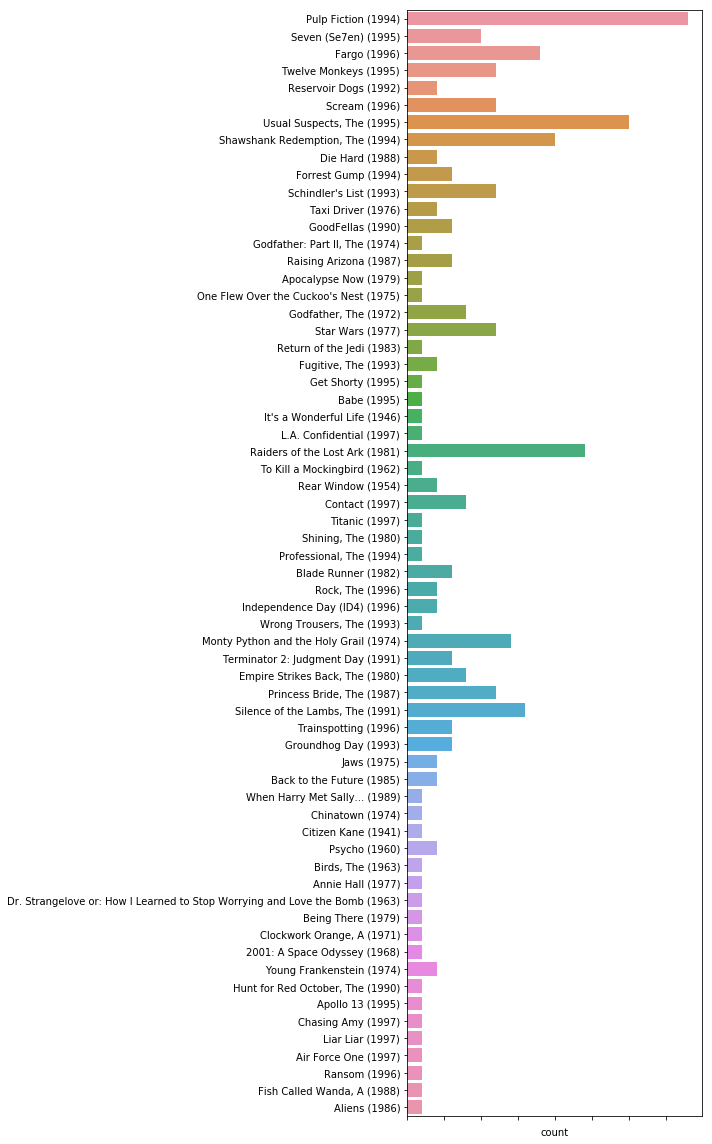

In [124]:
import seaborn as sns
plt.figure(figsize=(10,16))

ax = sns.countplot(y =movie_count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

It's hard to say if the recommender do a great job or not since the movies are all quite old. However, we can notice that using second way to split the data provide more reasonable result!

## Reference

http://blog.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/

http://nbviewer.jupyter.org/github/ethen8181/machine-learning/blob/master/recsys/1_ALSWR.ipynb

https://lazyprogrammer.me/tutorial-on-collaborative-filtering-and-matrix-factorization-in-python/

http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-gower-netflix-SVD.pdf

https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429